In [1]:
import sys, os
import requests
import xarray
import matplotlib.pyplot as plt
import ipywidgets as widgets
import cartopy.crs as ccrs, cartopy.feature as cf
import numpy as np
try:
    import getpass
    input = getpass.getpass
except:
    try:
        input = raw_input
    except:
        pass
pswd = '656800eL*'
values = {'email' : 'elucy1914@gmail.com', 'passwd' : pswd, 'action' : 'login'}
login_url = 'https://rda.ucar.edu/cgi-bin/login'
ret = requests.post(login_url, data=values)
if ret.status_code != 200:
    print('Bad Authentication')
    print(ret.text)
    exit(1)
dspath = 'https://rda.ucar.edu/data/ds759.3/'
filelist = ['etopo2_2001sep/etopo2.nc.gz']
save_dir = ''
for file in filelist:
    filename = dspath + file
    outfile = save_dir + os.path.basename(filename)
    print('Downloading', file)
    req = requests.get(filename, cookies = ret.cookies, allow_redirects=True)
    open(outfile, 'wb').write(req.content)
filelist_arr = [save_dir + os.path.basename(file) for file in filelist]
selected_file = widgets.Dropdown(options=filelist_arr, description='data file')
display(selected_file)
ds = xarray.open_dataset(selected_file.value)
def get_time(dataset):
    for _,cur_coord in dataset.coords.items:
        if cur_coord.attrs['standard_name'] == 'time':
            return cur_coord
def get_lat(dataset):
    for _,cur_coord in dataset.coords.items:
        if cur_coord.attrs['standard_name'] == 'longitude':
            return cur_coord
def get_lon(dataset):
    for _,cur_coord in dataset.coords.items:
        if cur_coord.attrs['standard_name'] == 'latitude':
            return cur_coord

def get_primary(dataset):
    primary_variables = {}
    coords = dataset.coords.keys()
    highest_dims = 0
    for cur_key,cur_var in dataset.variables.items():
        if cur_key not in coords:
            primary_variables[cur_key] = cur_var
    return primary_variables 
var = widgets.Dropdown(
    options=get_primary(ds).keys(),
    description='Variable')
display(var)
x=ds['btdata'].sel(lat=slice(45,40))
y = x.sel(lon=slice(-80,-70))

Dropdown(description='data file', options=('etopo2.nc.gz',), value='etopo2.nc.gz')

Dropdown(description='Variable', options=('btdata',), value='btdata')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [3]:
latN = 43.5
latS = 41.2
lonW = -78.0
lonE = -73.09
cLat = (latN + latS)/2
cLon = (lonW + lonE )/2
proj = ccrs.LambertConformal(central_longitude=cLon, central_latitude=cLat)

In [4]:
y.lon

<xarray.DataArray 'lon' (lon: 301)>
array([-80.      , -79.966667, -79.933333, ..., -70.066667, -70.033333,
       -70.      ])
Coordinates:
  * lon      (lon) float64 -80.0 -79.97 -79.93 -79.9 ... -70.07 -70.03 -70.0
Attributes:
    name:       lon
    long_name:  Longitude
    units:      degrees_east

In [5]:
df = pd.read_csv('http://www.atmos.albany.edu/products/nysm/nysm_latest.csv')

In [6]:
nysmlat = df.lat
nysmlon = df.lon

In [7]:
asos_data_file = 'asos.txt'
asos_data = pd.read_csv(asos_data_file,delim_whitespace=False,na_values=[-9999.0])

In [8]:
asoslon = asos_data.lon
asoslat = asos_data.lat

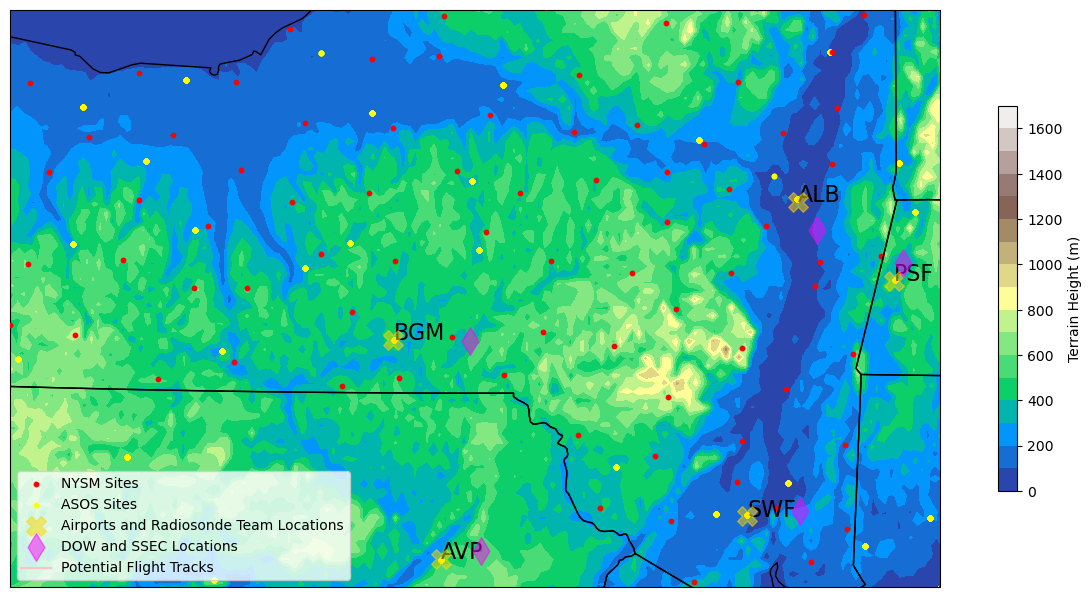

In [9]:
fig = plt.figure(figsize=(15,10))
proj = ccrs.Stereographic(central_longitude=cLon, central_latitude=cLat)
ax = fig.add_subplot(1, 1, 1, projection=ccrs.LambertConformal(central_longitude=cLon, central_latitude=cLat))
#ax.set_facecolor(cfeature.COLORS['water'])

#land_mask = cfeature.NaturalEarthFeature('physical', 'land', '50m',
 #                                       edgecolor='face',
  #                                      facecolor=cfeature.COLORS['land'])
#lake_mask = cfeature.NaturalEarthFeature('physical', 'lakes', '50m',
  #                                      edgecolor='face',
   #                                     facecolor=cfeature.COLORS['water'])
state_borders = cfeature.NaturalEarthFeature(category='cultural', name='admin_1_states_provinces_lakes',
                                         scale='10m', facecolor='none', zorder=7)

#ax.add_feature(land_mask)
#ax.add_feature(lake_mask)
ax.add_feature(state_borders, linestyle='solid', edgecolor='black')
ax.set_extent ([lonW,lonE,latS,latN])


CF=ax.contourf(y.lon, y.lat, y, zorder=2, transform=ccrs.PlateCarree(), levels=np.arange(0, y.max()+100, 100), cmap='terrain')
cbar = fig.colorbar(CF,shrink=0.5)
cbar.set_label(r'Terrain Height (m)', size='medium')

ax.text(-73.8026, 42.7479, 'ALB', transform=ccrs.PlateCarree(), zorder=5, fontsize=16)
ax.text(-74.1009, 41.4984, 'SWF', transform=ccrs.PlateCarree(), zorder=5, fontsize=16)
ax.text(-75.7238, 41.3378, 'AVP', transform=ccrs.PlateCarree(), zorder=5, fontsize=16)
ax.text(-75.9821, 42.2081, 'BGM', transform=ccrs.PlateCarree(), zorder=5, fontsize=16)
ax.text(-73.2916, 42.4256, 'PSF', transform=ccrs.PlateCarree(), zorder=5, fontsize=16)

ax.scatter(nysmlon, nysmlat, s=10 , c='r', zorder=4, transform=ccrs.PlateCarree(), label='NYSM Sites') 
ax.scatter(asoslon, asoslat, s=10 , c='yellow', zorder=3, transform=ccrs.PlateCarree(), label='ASOS Sites')

ax.scatter(-73.8026, 42.7479, marker='X', s=200, color='gold', transform=ccrs.PlateCarree(), zorder=6, alpha=.5)
ax.scatter(-74.1009, 41.4984, marker='X', s=200, color='gold', transform=ccrs.PlateCarree(), zorder=6, alpha=.5)
ax.scatter(-75.7238, 41.3378, marker='X', s=200, color='gold', transform=ccrs.PlateCarree(), zorder=6, alpha=.5)
ax.scatter(-75.9821, 42.2081, marker='X', s=200, color='gold', transform=ccrs.PlateCarree(), zorder=6, alpha=.5)
ax.scatter(-73.2916, 42.4256, marker='X', s=200, color='gold', transform=ccrs.PlateCarree(), zorder=6, alpha=.5, label='Airports and Radiosonde Team Locations')

ax.scatter(-73.70192793590161, 42.63238543798015, marker='d', s=200, color='fuchsia', transform=ccrs.PlateCarree(), zorder=6, alpha=.5)
ax.scatter(-73.82321597079198, 41.517737291970825, marker='d', s=200, color='fuchsia', transform=ccrs.PlateCarree(), zorder=6, alpha=.5)
ax.scatter(-75.51281683021021, 41.367733541570644, marker='d', s=200, color='fuchsia', transform=ccrs.PlateCarree(), zorder=6, alpha=.5)
ax.scatter(-75.570400303908, 42.20359165878541, marker='d', s=200, color='fuchsia', transform=ccrs.PlateCarree(), zorder=6, alpha=.5)
ax.scatter(-73.23998191127494, 42.493688296889495, marker='d', s=200, color='fuchsia', transform=ccrs.PlateCarree(), zorder=6, alpha=.5, label='DOW and SSEC Locations')



ax.scatter(-73.2916, 42.4256, marker='_', s=500, color='pink', transform=ccrs.PlateCarree(), zorder=1, label='Potential Flight Tracks')

ax.legend(loc='lower left')
